In [1]:
import pandas as pd
import missingno as mn
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = [20, 10]

### Transferred "CEO Pay and Employment Data at Tax-Dodging Corporations" table from Appendix 1 from Report A into `ips_appendix1`

In [2]:
ips_appendix1 = pd.read_csv('../csv/report_data/ips_appendix1.csv')
ips_appendix1.columns = ['Company Name', 'Profit ($mil 2008-2015)', 'Fed Tax Paid ($mil 2008-2015)', 'Effective Tax Rate (% 2008-2015)','Employee count (# end of 2016)', 'Difference in employee count (# 2008-2016)','Adjusted percent change in employees (% 2008-2016)', 'CEO compensation ($ 2016)', 'CEO compensation % change (2008-2016)']
ips_appendix1.index = ips_appendix1['Company Name']
ips_appendix1.drop(ips_appendix1.columns[0], axis = 1, inplace=True)
ips_appendix1.head()

,Profit ($mil 2008-2015),Fed Tax Paid ($mil 2008-2015),Effective Tax Rate (% 2008-2015),Employee count (# end of 2016),Difference in employee count (# 2008-2016),Adjusted percent change in employees (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016)
Company Name,,,,,,,,
AT&T,141624,11500,8.1,268000,-79450,-23,28433716,146
Verizon,81518,7401,9.1,160900,-78450,-33,17674579,-5
ExxonMobil,60482,8227,13.6,72700,-37735,-34,27393567,22
United Technologies,24421,2546,10.4,201600,-37000,-16,15831335,-12
JPMorgan Chase,114770,17956,15.6,243000,-26961,-10,27236892,39


### Transferred "Effective Federal Corporate Income Tax Rates on 258 Major Corporations, 2008–2015 (alphabetical)" table from Report B into `itep_tax_rates`

In [3]:
itep_tax_rates = pd.read_csv('../csv/report_data/itep_tax_rates.csv', na_values=['NaN'])
itep_tax_rates.columns= ['Company Name', 'Profit ($mil Eight Year Total)', 'Tax ($mil Eight Year Total)',
       'Rate (% Eight Year Total)', 'Profit ($mil 2015)', 'Tax ($mil 2015)', 'Rate (% 2015)',
       'Profit ($mil 2014)', 'Tax ($mil 2014)', 'Rate (% 2014)', 'Profit ($mil 2013)',
       'Tax ($mil 2013)', 'Rate (% 2013)', 'Profit ($mil 2008-12)', 'Tax ($mil 2008-12)',
       'Rate (% 2008-12)']
itep_tax_rates.index = itep_tax_rates['Company Name']
itep_tax_rates.drop(itep_tax_rates.columns[0], axis = 1, inplace=True)
itep_tax_rates.head()

,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),Tax ($mil 2013),Rate (% 2013),Profit ($mil 2008-12),Tax ($mil 2008-12),Rate (% 2008-12)
Company Name,,,,,,,,,,,,,,,
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,871.9,28.0,12589.9,2813.1,22.3
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,15.3,15.7,431.0,35.0,8.1
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,189.3,33.3,2528.7,671.4,26.6
Aetna,22564.1,7290.8,32.3,4133.0,1753.1,42.4,3423.0,1198.8,35.0,2899.2,832.9,28.7,12108.8,3505.9,29.0
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,166.0,35.4,1781.2,11.2,0.6


### Transferred "U.S. Profits & U.S. Federal Income Taxes versus Foreign Profits & Foreign Income Taxes, 2008-15 for companies with foreign pretax profits at least 10% of total worldwide pretax profits, \$-million" table from Report B into `itep_foreign`

In [4]:
itep_foreign = pd.read_csv('../csv/report_data/itep_foreign.csv')
itep_foreign.columns = ['Company Name', 'US profit', 'US tax', 'US rate', 'Foreign profit', 'Foreign tax',
                          'Foreign rate', 'US rate - Foreign rate']
itep_foreign.index = itep_foreign['Company Name']
itep_foreign.drop(itep_foreign.columns[0], axis = 1, inplace=True)
itep_foreign.head()

,US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate
Company Name,,,,,,,
Wal-Mart Stores,145059,48796,33.6,42692,11562,27.1,6.6
General Electric,40375,-1051,-2.6,85495,27726,32.4,-35.0
J.P. Morgan Chase & Co.,121544,24731,20.3,59592,12935,21.7,-1.4
McKesson,11973,2766,23.1,4811,576,12.0,11.1
International Business Machines,66753,6874,10.3,86183,21639,25.1,-14.8


### Transferred "3 Effective Federal Corporate Income Tax Rates on 258 Major Corporations, 2008–2015 by Industry" table from Report B into `itep_corp_indust`

In [5]:
itep_corp_indust = pd.read_csv('../csv/report_data/itep_corp_indust.csv')
itep_corp_indust.columns = ['Company Name', 'Industry']
itep_corp_indust.index = itep_corp_indust['Company Name']
itep_corp_indust.drop(itep_corp_indust.columns[0], axis = 1, inplace=True)
itep_corp_indust.head()

,Industry
Company Name,
Boeing,Aerospace & defense
United Technologies,Aerospace & defense
Rockwell Collins,Aerospace & defense
L-3 Communications,Aerospace & defense
Raytheon,Aerospace & defense


### Transferred industry categorization data from "100 Companies Paying Zero Tax or Less in at Least One Year, 2008–2015" table from Report B into `itep_zero_tax`

In [6]:
itep_zero_tax = pd.read_csv('../csv/report_data/itep_zero_tax.csv')
itep_zero_tax.columns = ['Company Name', 'Years with zero tax or less']
itep_zero_tax.index = itep_zero_tax['Company Name']
itep_zero_tax.drop(itep_zero_tax.columns[0], axis = 1, inplace=True)
itep_zero_tax.head()

,Years with zero tax or less
Company Name,
PG&E Corp.,8
AGL Resources,2
Pepco Holdings,7
Constellation Brands,2
Wisconsin Energy,7


### Transferred industry categorization data from "Company-By-Company Notes" from Report B into `itep_notes`

In [7]:
itep_notes = pd.read_csv('../csv/report_data/itep_notes.csv')
itep_notes.columns = ['Company Name', 'Note']
itep_notes.index = itep_notes['Company Name']
itep_notes.drop(itep_notes.columns[0], axis = 1, inplace=True)
itep_notes.head()

,Note
Company Name,
3M,The high tax rate in 2008 reflects a turnaroun...
ABM Industries,The company's fiscal years end in October of t...
Advance Auto Parts,Deferred taxes explain most of the company's s...
Aetna,The company's high tax rates in 2015 and 2014 ...
AGL Resources,The low tax rates in most years are explained ...


In [8]:
def tax_break(company_name):
    company_row = master_table.loc[company_name]
    return company_row['Profit ($mil Eight Year Total)'] * 0.35 - company_row['Tax ($mil Eight Year Total)']

#### Creating new `master_table`

In [9]:
master_table = itep_tax_rates.copy()

#### Merging `ips_appendix1` with `master_table`

In [10]:
ips_appendix1.index.difference(master_table.index)

Index(['21st Century Fox', 'Commty Health Systems', 'ExxonMobil', 'IBM',
       'JPMorgan Chase', 'PNC Financial Services', 'Public Service Enterprise',
       'Reinsurance Grp of Amer', 'Travelers', 'Verizon', 'WEC',
       'Wyndham Worldwide'],
      dtype='object', name='Company Name')

In [11]:
ips_appendix1.rename({'21st Century Fox': 'Twenty-First Century Fox',
                       'Commty Health Systems': 'Community Health Systems',
                       'ExxonMobil': 'Exxon Mobil',
                        'JPMorgan Chase': 'J.P. Morgan Chase & Co.',
                        'PNC Financial Services': 'PNC Financial Services Group',
                        'Public Service Enterprise': 'Public Service Enterprise Group',
                        'Reinsurance Grp of Amer': 'Reinsurance Group of America',
                        'Travelers': 'Travelers Cos.',
                        'Verizon': 'Verizon Communications'}, inplace=True)

master_table.rename({'International Business Machines': 'IBM',
                     'Wisconsin Energy': 'WEC',
                     'Wyndham Worldwide Corporation':'Wyndham Worldwide'}, inplace=True)

master_table = pd.concat([master_table, ips_appendix1[['Employee count (# end of 2016)','Difference in employee count (# 2008-2016)','Adjusted percent change in employees (% 2008-2016)','CEO compensation ($ 2016)', 'CEO compensation % change (2008-2016)']]], axis=1)

In [12]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),Tax ($mil 2013),Rate (% 2013),Profit ($mil 2008-12),Tax ($mil 2008-12),Rate (% 2008-12),Employee count (# end of 2016),Difference in employee count (# 2008-2016),Adjusted percent change in employees (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016)
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,871.9,28.0,12589.9,2813.1,22.3,NaN,NaN,NaN,NaN,NaN
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,15.3,15.7,431.0,35.0,8.1,110000.0,-2500.0,-2.0,3837985.0,37.0
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,166.0,35.4,1781.2,11.2,0.6,NaN,NaN,NaN,NaN,NaN
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,3043.0,15.8,86087.7,4352.4,5.1,268000.0,-79450.0,-23.0,28433716.0,146.0
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,189.3,33.3,2528.7,671.4,26.6,NaN,NaN,NaN,NaN,NaN


#### Merging `itep_foreign` with `master_table`

In [13]:
itep_foreign.index.difference(master_table.index)

Index(['Gamestop', 'International Business Machines',
       'Wyndham Worldwide Corporation'],
      dtype='object')

In [14]:
itep_foreign.rename({'Gamestop': 'GameStop',
                       'International Business Machines': 'IBM',
                       'Wyndham Worldwide Corporation': 'Wyndham Worldwide'}, inplace=True)
master_table = pd.concat([master_table, itep_foreign], axis=1)

In [15]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,Adjusted percent change in employees (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016),US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,NaN,NaN,NaN,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,-2.0,3837985.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,-23.0,28433716.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Merging `itep_corp_indust` with `master_table`

In [16]:
itep_corp_indust.index.difference(master_table.index)

Index(['International Business Machines', 'Wisconsin Energy',
       'Wyndham Worldwide Corporation'],
      dtype='object')

In [17]:
itep_corp_indust.rename({'International Business Machines': 'IBM',
                     'Wisconsin Energy': 'WEC',
                     'Wyndham Worldwide Corporation':'Wyndham Worldwide'}, inplace=True)
master_table = pd.concat([master_table, itep_corp_indust], axis=1)

In [18]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,CEO compensation ($ 2016),CEO compensation % change (2008-2016),US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,NaN,NaN,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8,Miscellaneous manufacturing
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,3837985.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miscellaneous services
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,28433716.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecommunications
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail & wholesale trade


#### Merging `itep_zero_tax` with `master_table`

In [19]:
itep_zero_tax.index.difference(master_table.index)

Index(['Group1 Automotive', 'International Business Machines',
       'Wisconsin Energy'],
      dtype='object')

In [20]:
itep_zero_tax.rename({'Group1 Automotive': 'Group 1 Automotive',
                     'International Business Machines': 'IBM',
                     'Wisconsin Energy':'WEC'}, inplace=True)
master_table = pd.concat([master_table, itep_zero_tax], axis=1)
master_table['Years with zero tax or less'].fillna(0, inplace=True)
master_table['Years with zero tax or less'] = master_table['Years with zero tax or less'].astype(int)

In [21]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,CEO compensation % change (2008-2016),US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry,Years with zero tax or less
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,NaN,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8,Miscellaneous manufacturing,0
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miscellaneous services,1
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,2
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecommunications,1
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail & wholesale trade,0


#### Merging `itep_notes` with `master_table`

In [22]:
itep_notes.index.difference(master_table.index)

Index(['Air Products and Chemicals', 'Amazon', 'Anthem',
       'Asbury Automotive Group', 'Autonation', 'Autozone', 'BB&T',
       'C.H. Robinson', 'Capital One', 'Coach', 'Discovery Communications',
       'Dish Network', 'Dupont', 'First Energy', 'Gamestop',
       'International Business Machines (IBM)', 'Interpublic', 'LKQ Corp',
       'Mastercard', 'McDonalds', 'PG&E Corp', 'Pepsico', 'Spartan Nash',
       'State Street', 'Unum', 'WEC Energy Group', 'Wal-Mart', 'Walgreens'],
      dtype='object')

In [23]:
itep_notes.rename({'Air Products and Chemicals': 'Air Products & Chemicals',
                   'Amazon': 'Amazon.com',
                   'Asbury Automotive Group': 'Asbury Automotive Group Inc.',
                   'Autonation': 'AutoNation',
                   'Autozone': 'AutoZone',
                   'BB&T': 'BB&T Corp.',
                   'C.H. Robinson': 'C.H. Robinson Worldwide',
                   'Capital One': 'Capital One Financial',
                   'Coach': 'Coach Inc.',
                   'Discovery Communications': 'Discovery Communications Inc.',
                   'Dupont': 'DuPont',
                   'First Energy': 'FirstEnergy',
                   'Gamestop': 'GameStop',
                   'International Business Machines (IBM)': 'IBM',
                   'Interpublic': 'Interpublic Group',
                   'LKQ Corp': 'LKQ Corporation',
                   'Mastercard': 'MasterCard',
                   'McDonalds': 'McDonald\'s',
                   'PG&E Corp': 'PG&E Corp.',
                   'Pepsico': 'PepsiCo',
                   'Spartan Nash': 'SpartanNash',
                   'State Street': 'State Street Corp.',
                   'Unum': 'Unum Group',
                   'WEC Energy Group': 'WEC',
                   'Wal-Mart': 'Wal-Mart Stores'}, inplace=True)

master_table.rename({'WellPoint': 'Anthem',
                     'DISH Network': 'Dish Network',
                     'Walgreen':'Walgreens'}, inplace=True)

master_table = pd.concat([master_table, itep_notes], axis=1)

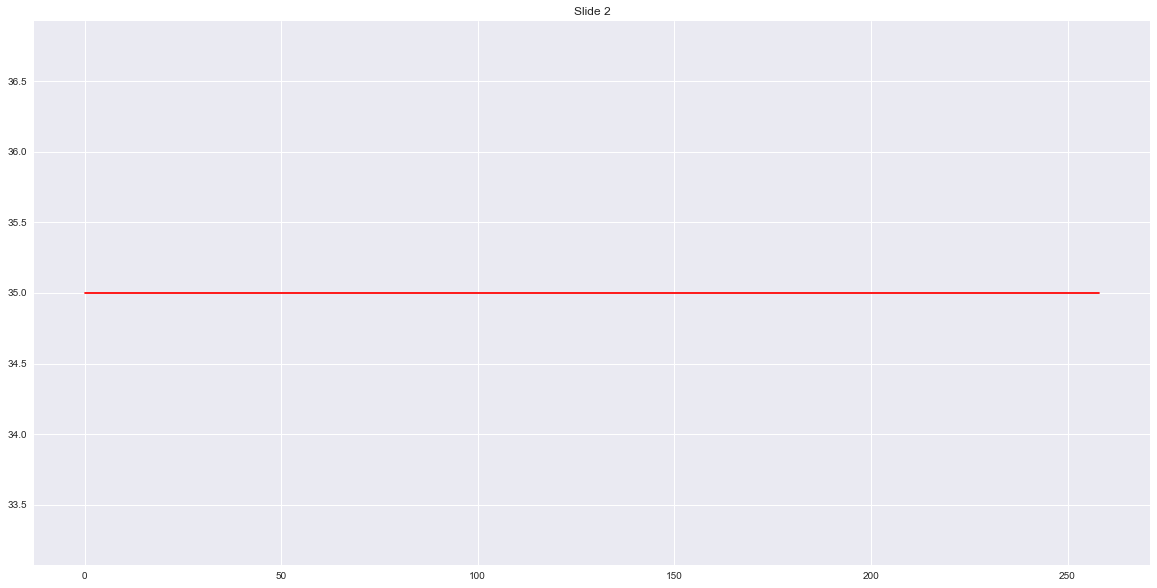

In [24]:
plt.plot([0,258],[35,35], 'r')
plt.title('Slide 2')
plt.show()

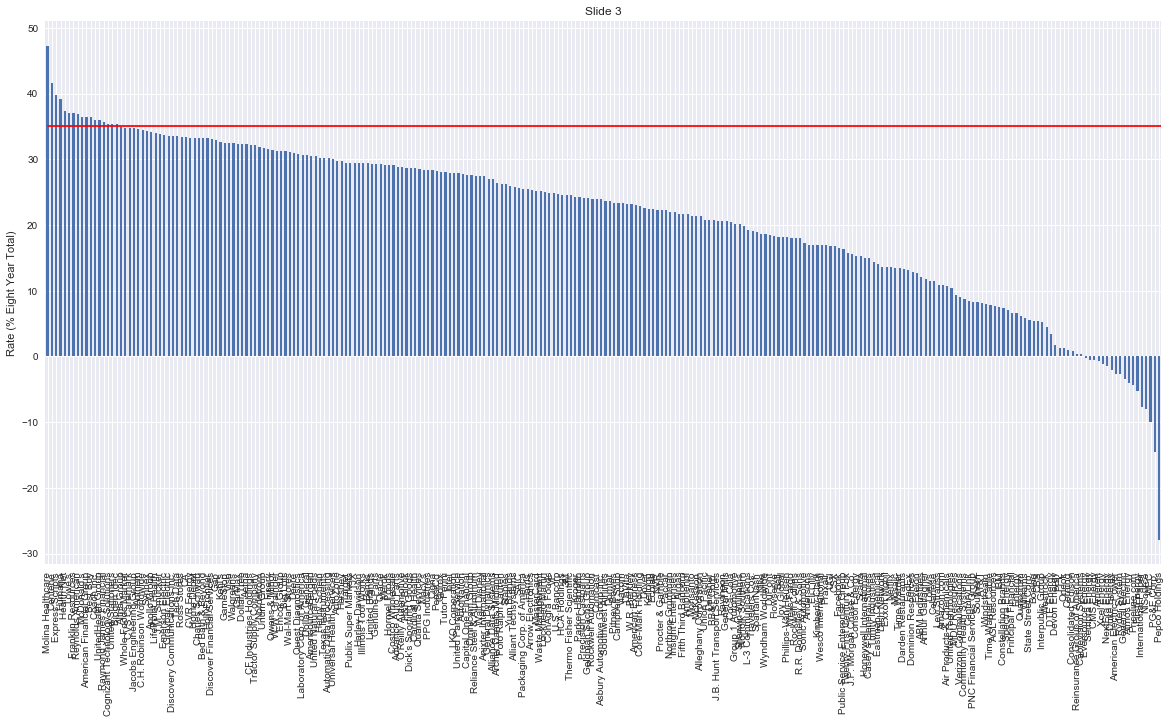

In [25]:
master_table['Rate (% Eight Year Total)'].sort_values(ascending=False).plot('bar').set_ylabel('Rate (% Eight Year Total)')
plt.plot([0,258],[35,35], 'r')
plt.title('Slide 3')
plt.show()

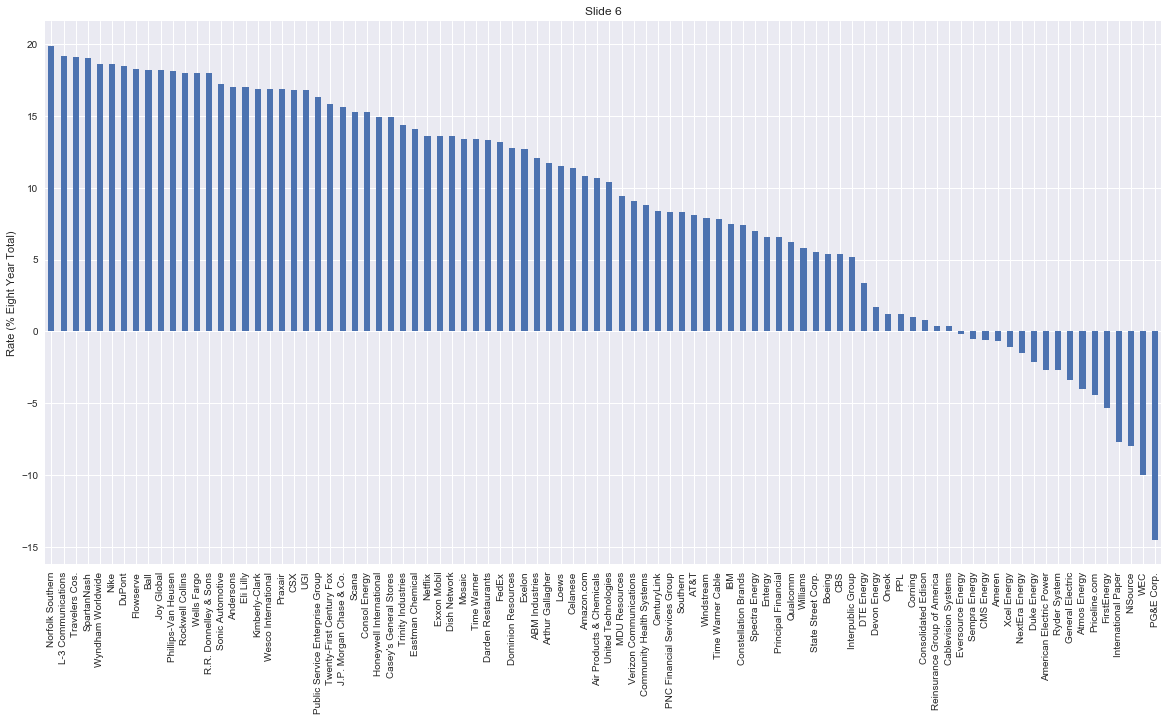

In [26]:
master_table[np.isfinite(master_table['CEO compensation ($ 2016)'])].sort_values('Rate (% Eight Year Total)', ascending=False)['Rate (% Eight Year Total)'].plot(kind='bar').set_ylabel('Rate (% Eight Year Total)')
plt.title('Slide 6')
plt.show()


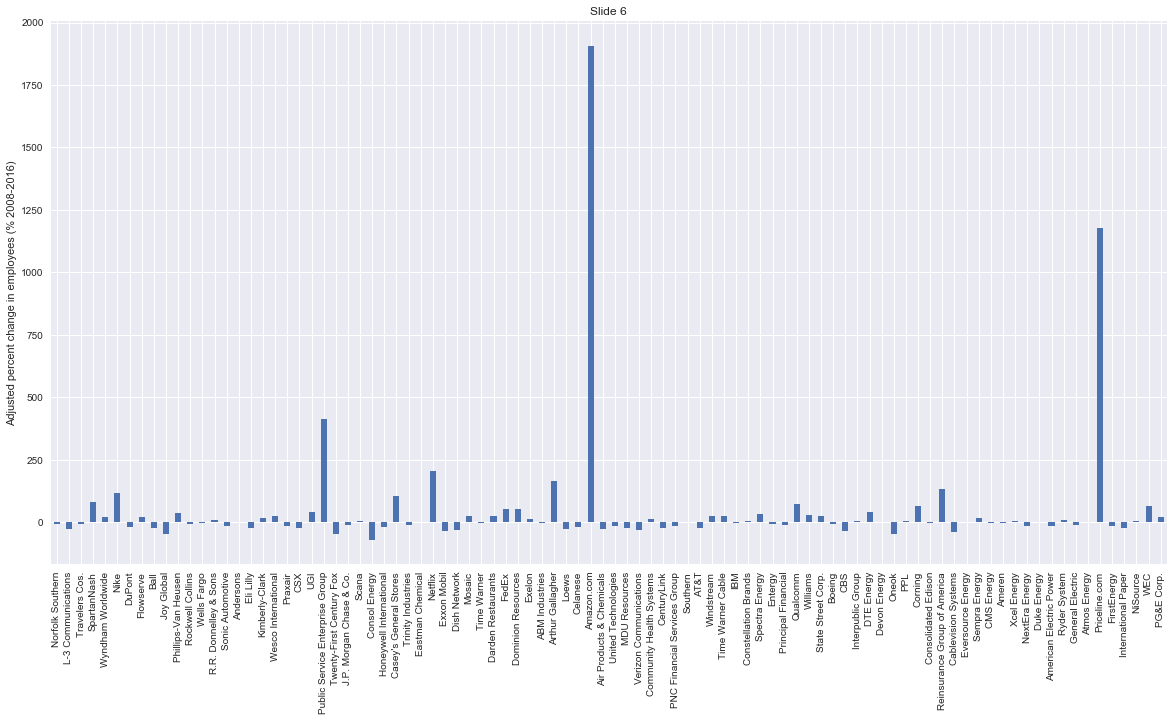

In [27]:
master_table[np.isfinite(master_table['CEO compensation ($ 2016)'])].sort_values('Rate (% Eight Year Total)', ascending=False)['Adjusted percent change in employees (% 2008-2016)'].plot(kind='bar').set_ylabel('Adjusted percent change in employees (% 2008-2016)')
plt.title('Slide 6')
plt.show()


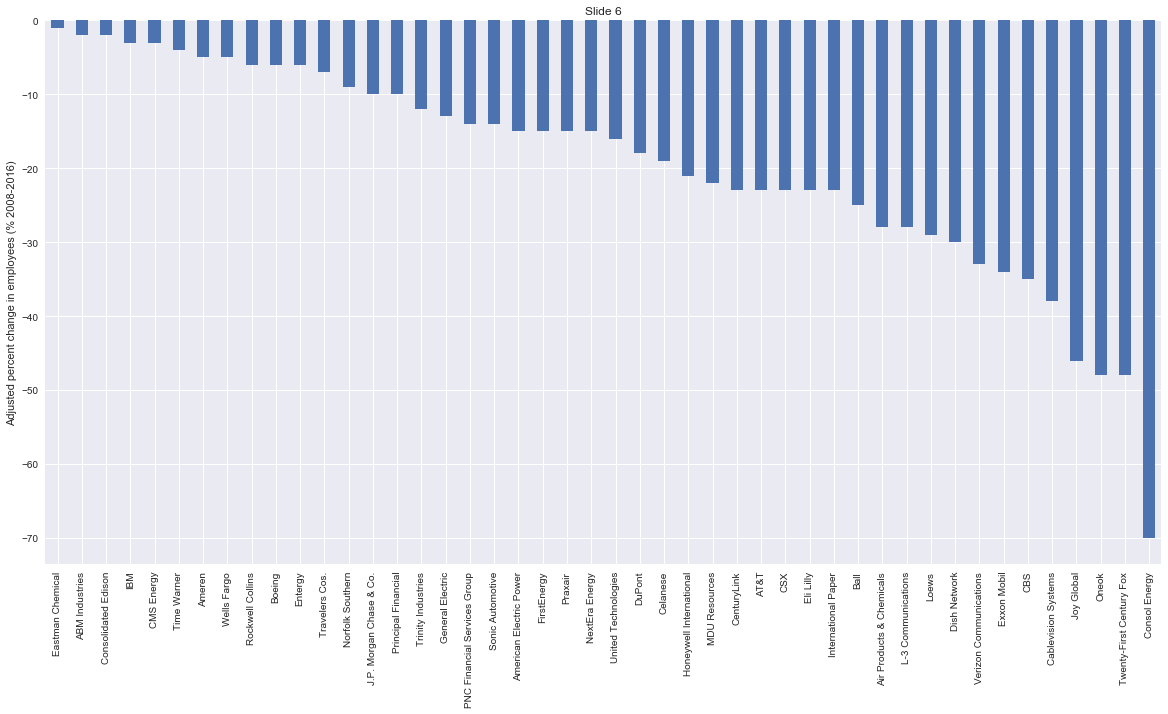

In [28]:
master_table[master_table['Adjusted percent change in employees (% 2008-2016)'] < 0]['Adjusted percent change in employees (% 2008-2016)'].sort_values(ascending=False).plot(kind='bar').set_ylabel('Adjusted percent change in employees (% 2008-2016)')
plt.title('Slide 6')
plt.show()


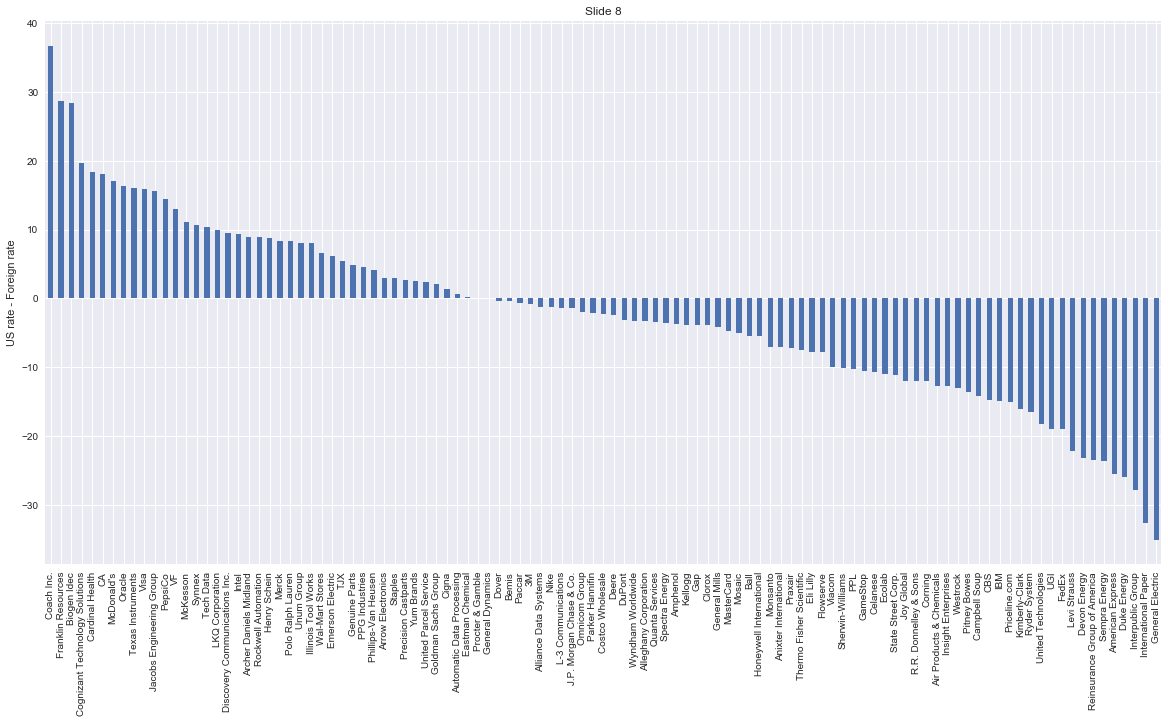

In [29]:
master_table['US rate - Foreign rate'].dropna().sort_values(ascending=False).plot(kind='bar').set_ylabel('US rate - Foreign rate')
plt.title('Slide 8')
plt.show()


### Creating new `interactive_data`

In [30]:
interactive_data = master_table.copy()

interactive_data.drop(['Profit ($mil Eight Year Total)',
                       'Tax ($mil Eight Year Total)',
                       'Profit ($mil 2015)', 'Tax ($mil 2015)',
                       'Rate (% 2015)', 'Profit ($mil 2014)', 'Tax ($mil 2014)',
                       'Rate (% 2014)', 'Profit ($mil 2013)', 'Tax ($mil 2013)',
                       'Rate (% 2013)', 'Profit ($mil 2008-12)', 'Tax ($mil 2008-12)',
                       'Rate (% 2008-12)', 'Employee count (# end of 2016)',
                       'Difference in employee count (# 2008-2016)',
                       'US profit', 'US tax', 'US rate', 'Foreign profit', 'Foreign tax',
                       'Foreign rate'], axis=1, inplace=True)
interactive_data.columns = ['rate','adjusted_emp_change','ceo_comp_amt','ceo_comp_change','us_foreign_diff','industry','years_no_tax','note']

In [31]:
tax_breaks = []
for company in master_table.index:
    tax_breaks.append(tax_break(company))
    
interactive_data['tax_break'] = tax_breaks

In [32]:
interactive_data.head()

,rate,adjusted_emp_change,ceo_comp_amt,ceo_comp_change,us_foreign_diff,industry,years_no_tax,note,tax_break
3M,24.6,NaN,NaN,NaN,-0.8,Miscellaneous manufacturing,0,The high tax rate in 2008 reflects a turnaroun...,2467.440
ABM Industries,12.1,-2.0,3837985.0,37.0,NaN,Miscellaneous services,1,The company's fiscal years end in October of t...,159.400
AGL Resources,7.6,NaN,NaN,NaN,NaN,Utilities/gas/electric,2,The low tax rates in most years are explained ...,1008.870
AT&T,8.1,-23.0,28433716.0,146.0,NaN,Telecommunications,1,The company reports noncontrolling interest in...,38067.895
Advance Auto Parts,28.8,NaN,NaN,NaN,NaN,Retail & wholesale trade,0,Deferred taxes explain most of the company's s...,276.330


### Creating `stock_options` column

In [33]:
interactive_data['stock_options'] = interactive_data['note'].str.contains('stock options', case=False)
interactive_data['stock_options'].value_counts(dropna=False)

True     191
False     61
NaN        6
Name: stock_options, dtype: int64

### Creating `research_experiment` column

In [34]:
interactive_data['research_experiment'] = interactive_data['note'].str.contains('research and experimentation', case=False)
interactive_data['research_experiment'].value_counts(dropna=False)

False    226
True      26
NaN        6
Name: research_experiment, dtype: int64

### Creating `dpad` column

In [35]:
interactive_data['dpad'] = interactive_data['note'].str.contains('Domestic Production Activities Deduction', case=False)
interactive_data['dpad'].value_counts(dropna=False)

False    167
True      85
NaN        6
Name: dpad, dtype: int64

### Creating `acc_depreciation` column

In [36]:
interactive_data['acc_depreciation'] = interactive_data['note'].str.contains('accelerated', case=False)
interactive_data['acc_depreciation'].value_counts(dropna=False)

False    190
True      62
NaN        6
Name: acc_depreciation, dtype: int64

### Creating `deferred_taxes` column

In [37]:
interactive_data['deferred_taxes'] = interactive_data['note'].str.contains('deferred', case=False)
interactive_data['deferred_taxes'].value_counts(dropna=False)

False    173
True      79
NaN        6
Name: deferred_taxes, dtype: int64

### Creating `competitor` column

In [38]:
interactive_data['competitor'] = np.nan

competitors = {
    'Honeywell International': 1,
    'Deere': 1,
    'Boeing': 2,
    'General Dynamics': 2,
    'Kimberly-Clark': 3,
    'Clorox': 3,
    'Eli Lilly': 4,
    'Biogen Idec': 4,
    'Time Warner Cable': 5,
    'Comcast': 5
}

for company in competitors:
    interactive_data.set_value(company, 'competitor', competitors[company])

### Saving `interactive_data` into csv

In [39]:
interactive_data.to_csv('../csv/dv_data/interactive_data.csv', index_label='company_name')

In [40]:
interactive_data.head()

,rate,adjusted_emp_change,ceo_comp_amt,ceo_comp_change,us_foreign_diff,industry,years_no_tax,note,tax_break,stock_options,research_experiment,dpad,acc_depreciation,deferred_taxes,competitor
3M,24.6,NaN,NaN,NaN,-0.8,Miscellaneous manufacturing,0,The high tax rate in 2008 reflects a turnaroun...,2467.440,True,True,True,False,True,NaN
ABM Industries,12.1,-2.0,3837985.0,37.0,NaN,Miscellaneous services,1,The company's fiscal years end in October of t...,159.400,True,False,False,False,False,NaN
AGL Resources,7.6,NaN,NaN,NaN,NaN,Utilities/gas/electric,2,The low tax rates in most years are explained ...,1008.870,True,False,False,True,True,NaN
AT&T,8.1,-23.0,28433716.0,146.0,NaN,Telecommunications,1,The company reports noncontrolling interest in...,38067.895,True,False,False,False,False,NaN
Advance Auto Parts,28.8,NaN,NaN,NaN,NaN,Retail & wholesale trade,0,Deferred taxes explain most of the company's s...,276.330,True,False,False,True,True,NaN


In [46]:
len(interactive_data[interactive_data['years_no_tax'] == 3])

13